# Otsu算法的实现

### 读取MPA.pgm图片

In [48]:
import cv2

img = cv2.imread("MRA.pgm")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 将图像转换成灰度图
print(img_gray.shape)
cv2.imshow("img_gray", img_gray)
k = cv2.waitKey(0)
if k == 27:         # 按下esc时，退出
    cv2.destroyAllWindows()
elif k == ord('s'): # 按下s键时保存并退出
    cv2.imwrite('img_gray.png',img)
    cv2.destroyAllWindows()

(69, 138)


### 直接调用opencv的函数

In [4]:
import cv2

img = cv2.imread("MRA.pgm", cv2.IMREAD_GRAYSCALE)
retVal, img_Otsu_opencv = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
print("调用opencv函数的结果：" + str(retVal))	# 结果为 20.0
cv2.imshow("image_Otsu", img_Otsu_opencv)
k = cv2.waitKey(0)
if k == 27:         # 按下esc时，退出
    cv2.destroyAllWindows()
elif k == ord('s'): # 按下s键时保存并退出
    cv2.imwrite('img_Otsu_opencv.png',img_Otsu_opencv)
    cv2.destroyAllWindows()

调用opencv函数的结果：20.0


### 使用numpy自己实现算法

In [58]:
import numpy as np
import cv2 as cv

img = cv2.imread("MRA.pgm", cv2.IMREAD_GRAYSCALE)
img_gray=np.array(img_gray).ravel().astype(np.uint8)
u1=0.0#背景像素的平均灰度值
u2=0.0#前景像素的平均灰度值
th=0.0

#总的像素数目
PixSum=img_gray.size
# 各个灰度值的像素数目
PixCount=np.zeros(256)
#各灰度值所占总像素数的比例
PixRate=np.zeros(256)
#统计各个灰度值的像素个数
for i in range(PixSum):
    #默认灰度图像的像素值范围为256
    Pixvalue=img_gray[i]
    PixCount[Pixvalue]=PixCount[Pixvalue]+1
    
#确定各个灰度值对应的像素点的个数在所有的像素点中的比例。
for j in range(256):
    PixRate[j]=PixCount[j]*1.0/PixSum
Max_var = 0
#确定最大类间方差对应的阈值
for i in range(1,256):#从1开始是为了避免w1为0.
    u1_tem=0.0
    u2_tem=0.0
    #背景像素的比列
    w1=np.sum(PixRate[:i])
    #前景像素的比例
    w2=1.0-w1
    if w1==0 or w2==0:
        pass
    else:#背景像素的平均灰度值
        for m in range(i):
            u1_tem=u1_tem+PixRate[m]*m
        u1 = u1_tem * 1.0 / w1
        #前景像素的平均灰度值
        for n in range(i,256):
            u2_tem = u2_tem + PixRate[n]*n
        u2 = u2_tem / w2
        #print(u1)
        #类间方差公式：G=w1*w2*(u1-u2)**2
        tem_var=w1*w2*np.power((u1-u2),2)
        #print(tem_var)
        #判断当前类间方差是否为最大值。
        if Max_var<tem_var:
            Max_var=tem_var#深拷贝，Max_var与tem_var占用不同的内存空间。
            th=i
print("使用numpy的方法：" + str(th))		# 结果为21

result,img_otsu=cv2.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# 展示图像
cv2.imshow("img_otsu", img_otsu)
k = cv2.waitKey(0)
if k == 27:         # 按下esc时，退出
    cv2.destroyAllWindows()
elif k == ord('s'): # 按下s键时保存并退出
    cv2.imwrite('img_otsu.png',img_otsu)
    cv2.destroyAllWindows()

使用numpy的方法：21


### 绘制灰度直方图

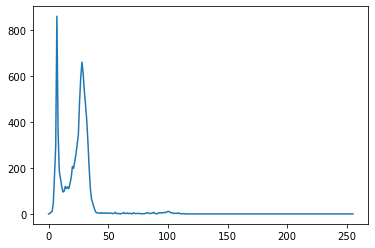

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv2.imread("MRA.pgm")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 将图像转换成灰度图
# hist是256x1数组，每个值对应于该图像中具有相应像素值的像素数
hist = cv.calcHist([img_gray],[0],None,[256],[0,256])
# 绘制直方图
plt.plot(hist)
plt.show()

In [81]:
import numpy as np
import cv2 as cv

def RCOtsu(gray_image,th_begin,th_end):
    # th_begin到th_end即为基于直方图判断出的感兴趣的区域
    h = gray_image.shape[0]
    w = gray_image.shape[1]
    threshold_t = 0
    max_g = 0
    
    # 遍历每一个灰度层
    for t in range(th_begin,th_end):
        n0 = gray_image[np.where(gray_image < t)]
        n1 = gray_image[np.where(gray_image >= t)]
        w0 = len(n0) / (h * w)
        w1 = len(n1) / (h * w)
        u0 = np.mean(n0) if len(n0) > 0 else 0.
        u1 = np.mean(n1) if len(n0) > 0 else 0.
        
        g = w0 * w1 * (u0 - u1) ** 2
        if g > max_g:
            max_g = g
            threshold_t = t
            
    after_otsu = gray_image.copy()
    print('类间方差最大阈值：', threshold_t)
    
    after_otsu[gray_image < threshold_t] = 0
    after_otsu[gray_image >= threshold_t] = 255
    return after_otsu


img = cv2.imread("MRA.pgm")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 将图像转换成灰度图
img_RCOtsu = RCOtsu(img_gray, 40, 120)  # 基于直方图判断出感兴趣的区域大概在灰度值为40到120的区域

cv2.imshow("img_RCOtsu", img_RCOtsu)
k = cv2.waitKey(0)
if k == 27:         # 按下esc时，退出
    cv2.destroyAllWindows()
elif k == ord('s'): # 按下s键时保存并退出
    cv2.imwrite('img_RCOtsu.png',img_RCOtsu)
    cv2.destroyAllWindows()


类间方差最大阈值： 55
